#1. 공공데이터 상권정보 분석해보기

##1.1 필요한 라이브러리 불러오기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

##1.2 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='NanumBarunGothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

##1.3 데이터 로드하기

In [29]:
df = pd.read_csv('data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv',encoding='cp949')
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.127310e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.168010e+24,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4.139010e+24,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2.650010e+24,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4.146510e+24,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3.017010e+24,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4.128110e+24,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2.641010e+24,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2.0,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.174010e+24,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993


##1.4 데이터 미리보기

In [30]:
# 데이터 미리보기
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.127310e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.168010e+24,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4.139010e+24,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2.650010e+24,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4.146510e+24,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [31]:
# 데이터 뒷부분 보기
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3.017010e+24,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4.128110e+24,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2.641010e+24,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2.0,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.174010e+24,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.413110e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


##1.5 데이터 요약하기

###1.5.1 요약정보

In [32]:
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

###1.5.2 컬럼명 보기

In [33]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

###1.5.3 데이터 타입

In [34]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

##1.6 결측치

In [36]:
# True : null data / Fasle : data
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [37]:
null_count = df.isnull().sum() # 결측치 총 수
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

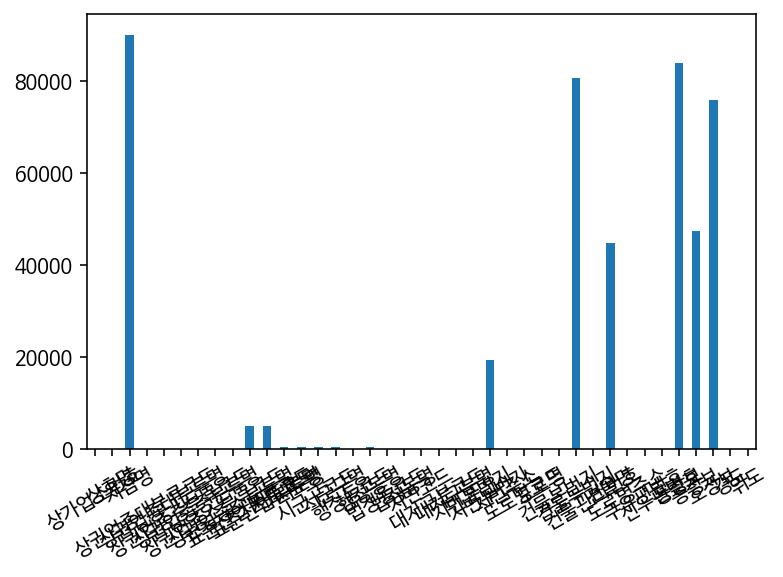

In [38]:
null_count.plot.bar(rot=30)  # rot를 활용해서 글씨를 돌릴 수 있다.

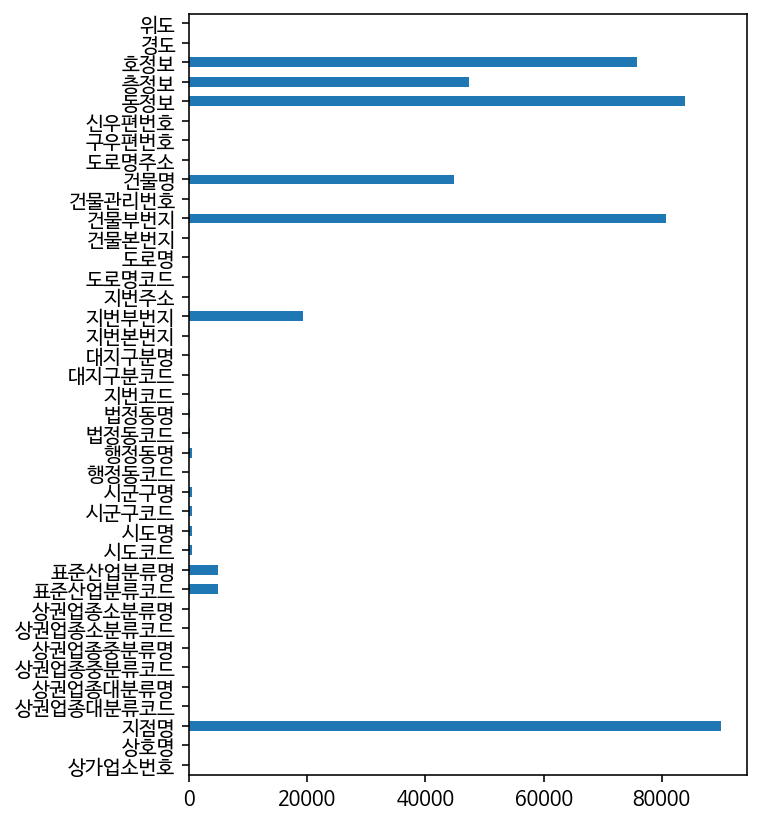

In [39]:
null_count.plot.barh(figsize =(5,7))

In [40]:
df_null_count = null_count.reset_index() #데이터프레임으로 만들어주기
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


##1.7 컬러명 변경하기

In [41]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


##1.8 정렬하기

In [42]:
# 결측치수가 많은 순으로 10개 출력
df_null_count_top = df_null_count.sort_values(by="결측치수",ascending = False).head(10) # True : 오름차순 / False : 내림차순
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


##1.9 특정 컬럼만 불러오기

In [43]:
# NaN : Not a Number의 약자로 결측치를 의미

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [44]:
# 결측치가 많은 변수들을 하나의 변수에 담는다.
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [45]:
# 결측치가 많은 변수들의 정보만 불러오기
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


##1.10 제거하기

In [46]:
print(df.shape) # 제거하기전
df1 = df.drop(drop_columns, axis = 1) # 0은 행 1은 열을 기준!!
print(df1.shape) # 제거한 후

(91335, 39)
(91335, 29)


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  float64
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

##1.11 기초 통계값 보기

###1.11.1 기초 통계 수치

In [48]:
# 평균값
df1["위도"].mean()

36.62471119236065

In [49]:
# 중앙값
df1["위도"].median()

37.23465232

In [50]:
# 최댓값
df1["위도"].max()

38.49965857

In [51]:
# 최솟값
df1["위도"].min()

33.21928967

In [52]:
# 갯수
df1["위도"].count()

91335

###1.11.2 기초 통계값 요약하기 - describe

In [53]:
# 1개의 컬럼 요약

df1["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [54]:
# 2개의 컬럼 요약

df1[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [55]:
# describe로 문자열 데이터 타입 요약
df1.describe(include="object") # number : 수치형 / object : 문자형 -> 기본은 수치형이다.

# 문자형은 숫자형과 다르게 unique : 종류 수 / top : 가장 많은 것 / freq : 가장 많은 것의 수

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


###1.11.3 중복제거한 값 보기

In [56]:
# 상권업종대분류명 중복 값 제거 -> 의료
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [57]:
df["상권업종대분류명"].nunique()

1

In [58]:
# 상권업종중분류명 중복 값 제거 -> 5가지
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [59]:
df["상권업종중분류명"].nunique()

5

In [60]:
# 상권업종소분류명 중복 값 제거 -> 34가지
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [61]:
df["상권업종소분류명"].nunique()

34

In [62]:
# len 함수를 이용해서 nunique()과 같은 효과 보기
len(df["상권업종소분류명"].unique())

34

###1.11.4 그룹화된 요약값 보기 - value_counts
  * 카테고리 형태의 데이터 갯수를 세어볼 수 있다.

In [63]:
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [67]:
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [68]:
# normalize=True를 통해 비율을 구할 수 있다.
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

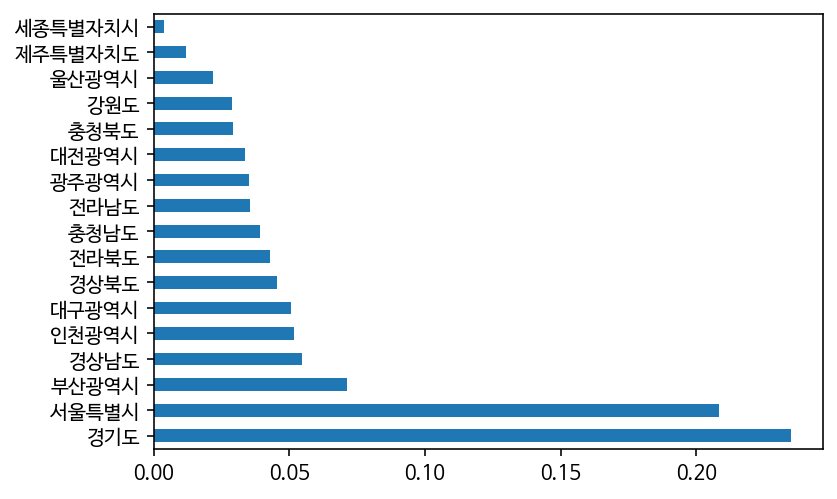

In [70]:
# 도시 비율별 막대그래프
city_normalize.plot.barh()

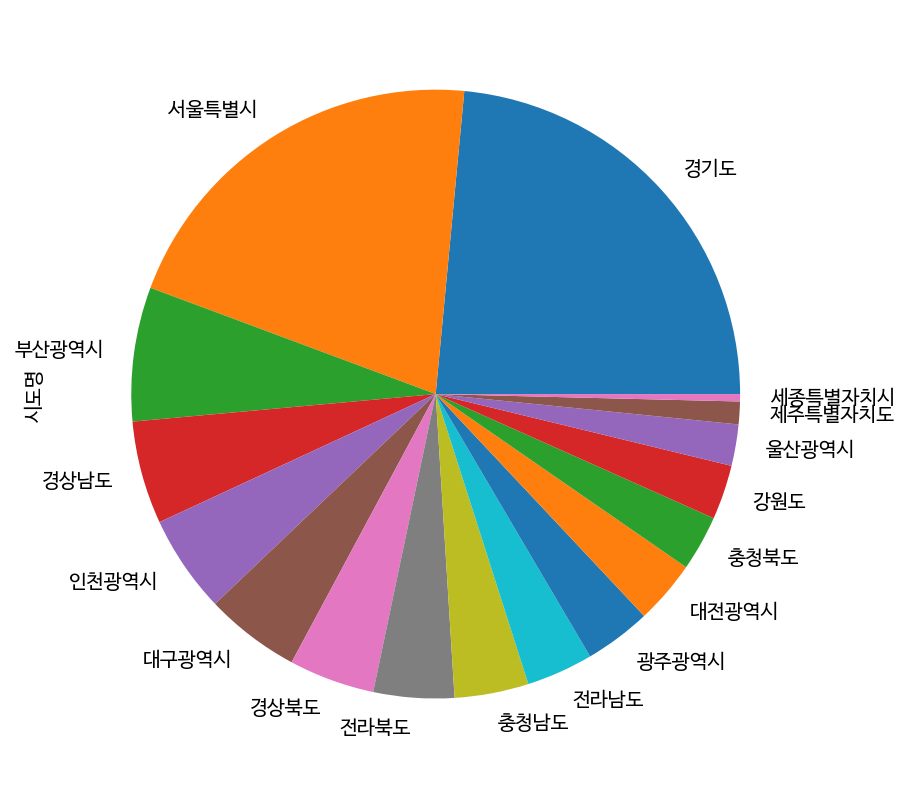

In [71]:
# 도시 비율별 파이차트
city_normalize.plot.pie(figsize=(7,7))

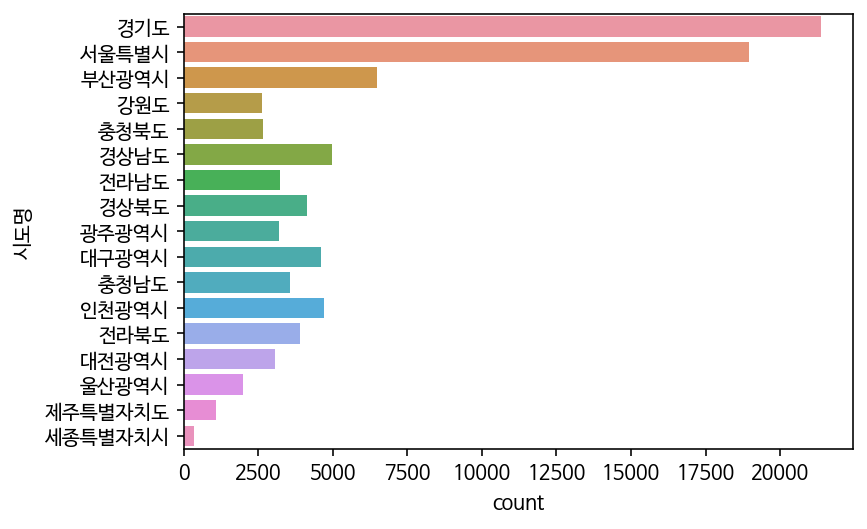

In [76]:
# seaborn 라이브러리 사용
c = sns.countplot(data = df1, y = "시도명") # 변수에 담아주면 그래프만 출력된다.

In [77]:
# 상권업종대분류명 갯수 세기
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [81]:
# 상권업종중분류명 갯수 세기
c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [82]:
# 상권업종중분류명 비율
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

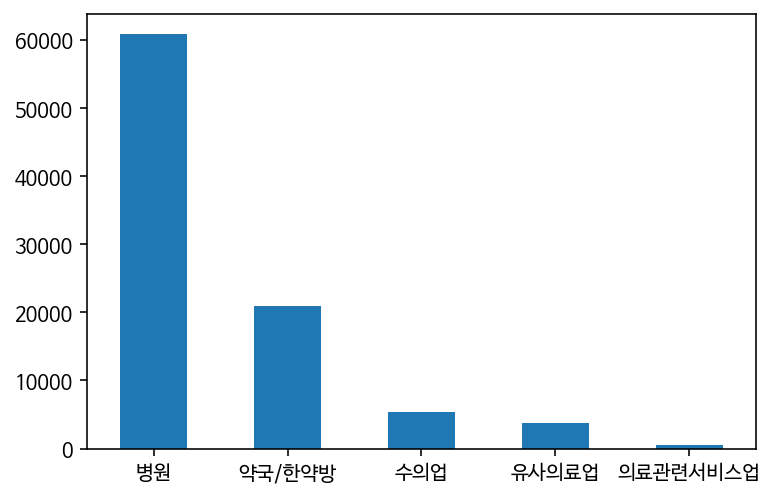

In [84]:
c.plot.bar(rot=0)

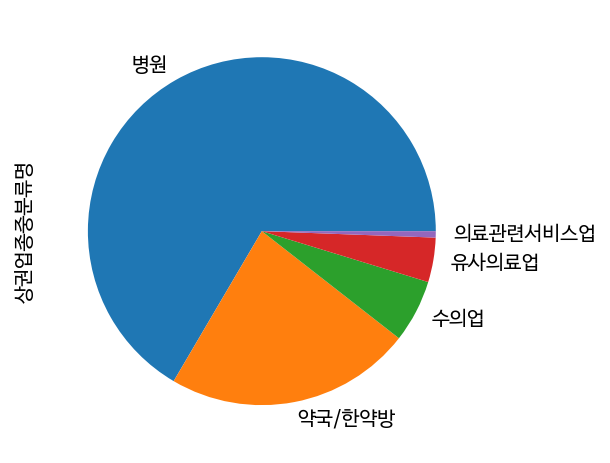

In [86]:
n.plot.pie()

In [89]:
# 상권업종소분류명 갯수 세기
s = df["상권업종소분류명"].value_counts()
s

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

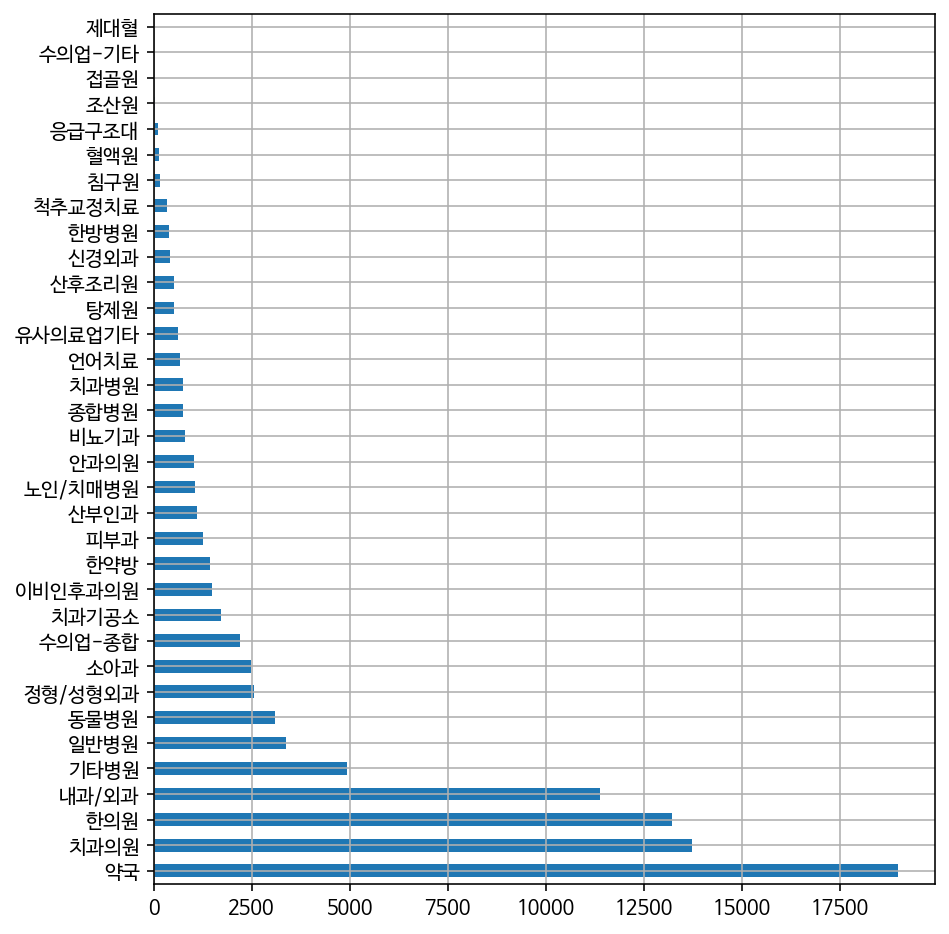

In [95]:
s.plot.barh(figsize=(7,8), grid = True) # grid 파라미터 : 그래프에 격자 표시 기능

##1.12 데이터 색인하기

In [100]:
# 상권업종중분류명이 약국/한약방인 데이터만 가져와서 변수에 담기

df_medical = df1[df1["상권업종중분류명"] ==  "약국/한약방"].copy()
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,4.146530e+11,경기도 용인시 수지구 문정로,32,4.146510e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [106]:
m = df1["상권업종대분류명"] == "의료"
df.loc[m,"상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [116]:
# 유사의료업 따로 모으기
df_medi = df1[df1["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [121]:
# 상호명 별 갯수 세기
df1["상호명"].value_counts().head(10)
# df1["상호명"].value_counts().tail()

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [120]:
# 유사의료업의 상호명 별 갯수 세기
df_medi["상호명"].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

###1.12.1 여러 조건으로 색인하기

In [126]:
# 상권업종소분류명이 약국이고 시도명이 서울특별시인 데이터만 가져오기
df_seoul_drug = df1[(df1["상권업종소분류명"] == "약국") & (df1["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head()

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,1.168030e+11,서울특별시 강남구 테헤란로,101,1.168010e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,1.174030e+11,서울특별시 강동구 명일로,172,1.174010e+24,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,...,서울특별시 중랑구 신내동 646,1.126030e+11,서울특별시 중랑구 신내로,211,1.126010e+24,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,...,서울특별시 성동구 행당동 346,1.120030e+11,서울특별시 성동구 행당로,82,1.120010e+24,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,...,서울특별시 동대문구 휘경동 286-121,1.123040e+11,서울특별시 동대문구 망우로18나길,3,1.123010e+24,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
